In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [65]:
df = pd.read_csv("../../course_assignments/homework9/solar_system.csv", index_col=0)


In [66]:
df.shape #20 rows, 11 columns

(20, 10)

In [67]:
df.head()

,Mercury,Venus,Earth,Moon,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto
Attribute,,,,,,,,,,
Mass (10^24kg),0.330,4.87,5.97,0.073,0.642,1898,568,86.8,102,0.0130
Diameter (km),4879,12104,12756,3475,6792,142984,120536,51118,49528,2376
Density (kg/m^3),5429,5243,5514,3340,3934,1326,687,1270,1638,1850
Gravity (m/s^2),3.7,8.9,9.8,1.6,3.7,23.1,9.0,8.7,11.0,0.7
Escape Velocity (km/s),4.3,10.4,11.2,2.4,5.0,59.5,35.5,21.3,23.5,1.3


In [68]:
df.tail()

,Mercury,Venus,Earth,Moon,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto
Attribute,,,,,,,,,,
Mean Temperature (C),167,464,15,-20,-65,-110,-140,-195,-200,-225
Surface Pressure (bars),0,92,1,0,0.01,Unknown,Unknown,Unknown,Unknown,0.00001
Number of Moons,0,0,1,0,2,95,274,28,16,5
Ring System?,No,No,No,No,No,Yes,Yes,Yes,Yes,No
Global Magnetic Field?,Yes,No,Yes,No,No,Yes,Yes,Yes,Yes,Unknown


In [69]:
df.columns

Index(['Mercury', 'Venus', 'Earth', 'Moon', 'Mars', 'Jupiter', 'Saturn',
       'Uranus', 'Neptune', 'Pluto'],
      dtype='object')

In [70]:
print(df.index)

Index(['Mass (10^24kg)', 'Diameter (km)', 'Density (kg/m^3)',
       'Gravity (m/s^2)', 'Escape Velocity (km/s)', 'Rotation Period (hours)',
       'Length of Day (hours)', 'Distance from Sun (10^6 km)',
       'Perihelion (10^6 km)', 'Aphelion (10^6 km)', 'Orbital Period (days)',
       'Orbital Velocity (km/s)', 'Orbital Inclination (deg)',
       'Orbital Eccentricity', 'Obliquity to Orbit (deg)',
       'Mean Temperature (C)', 'Surface Pressure (bars)', 'Number of Moons',
       'Ring System?', 'Global Magnetic Field?'],
      dtype='object', name='Attribute')


In [71]:
orbital_period = df.loc["Orbital Period (days)"].astype(float).values
perihelion = df.loc["Perihelion (10^6 km)"].astype(float).values
aphelion = df.loc["Aphelion (10^6 km)"].astype(float).values



In [72]:
#perihelion is when the planet is closest to the sun
#aphelion is when the planet is furthest from the sun
#semi-major axis is the average of perihelion and aphelion

In [73]:
semi_major_axis = (perihelion + aphelion)/2
semi_major_series = pd.Series(semi_major_axis, index = df.columns, name="Semi-major axis (km)")
df_new = pd.concat([df, semi_major_series])


In [74]:
df_new.shape #30 rows, 6 columns

(30, 11)

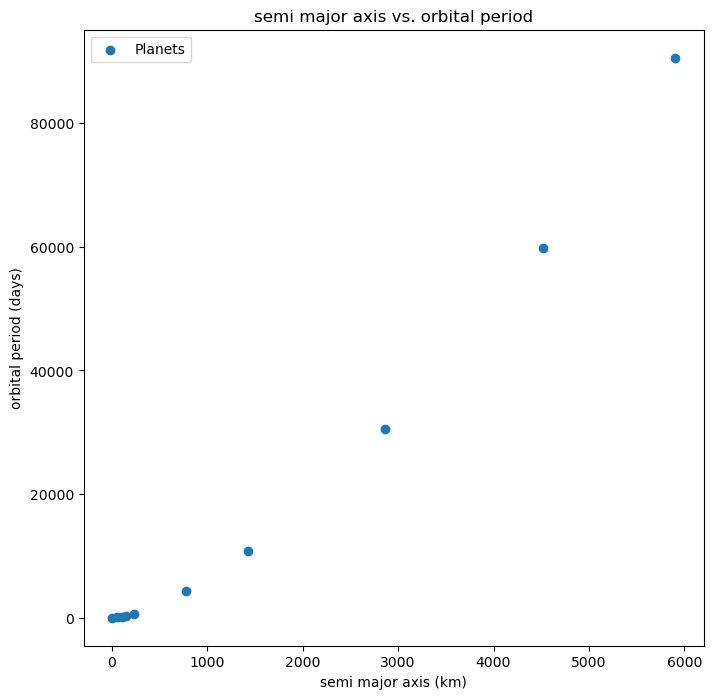

In [75]:
plt.figure(figsize=(8,8))
plt.scatter(semi_major_axis, orbital_period, label = "Planets")
plt.xlabel("semi major axis (km)")
plt.ylabel("orbital period (days)")
plt.title("semi major axis vs. orbital period")
plt.legend()
plt.show()


In [76]:
def keplers_third_law(a,m):
    return m * a**1.5

reduced chi-squared value: 41276.71


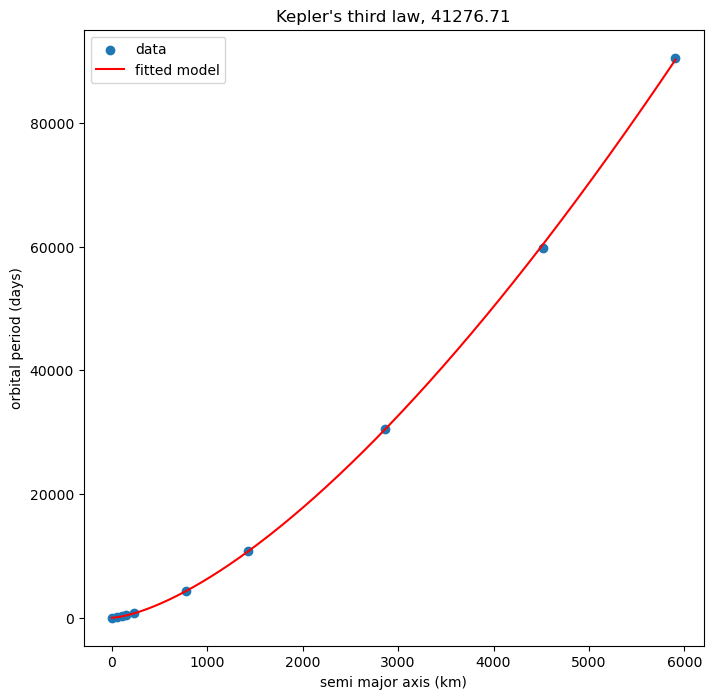

In [80]:
p0 = [1]   
popt, pcov = curve_fit(keplers_third_law, semi_major_axis, orbital_period, p0=p0)
m_fit = popt[0]






residuals = orbital_period - keplers_third_law(semi_major_axis, m_fit)
chi2 = np.sum(residuals**2)
dof = len(orbital_period) - len(popt)
chi2_reduced = chi2 / dof
print("reduced chi-squared value:", round(chi2_reduced, 2))


vals = np.linspace(min(semi_major_axis), max(semi_major_axis), 500)
fit_vals = keplers_third_law(vals, m_fit)

plt.figure(figsize=(8,8))

plt.scatter(semi_major_axis, orbital_period, label="data")
plt.plot(vals, fit_vals, color="red", label="fitted model")
plt.xlabel("semi major axis (km)")
plt.ylabel("orbital period (days)")
plt.title(f"Kepler's third law, {chi2_reduced:.2f}")
plt.legend()
plt.show()


In [79]:
df_new.to_csv("kepler.csv",index=True)
